## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

这里我使用 wiki_corpus.py 对内容进行抽取，得到wiki.txt

然后将文本里的繁体都转换为简体，使用opencc，需要安装opencc，得到wiki_simple.txt

然后使用 only_chinese.py 只提取文本里的中文，去除英文内容，并且进行分词处理，得到wiki_only_simple_and_cut.txt

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

In [16]:
from gensim.models import word2vec
import logging

In [14]:
corpus_line = word2vec.LineSentence('wiki_only_simple_and_cut.txt')

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
cbow_model = word2vec.Word2Vec(corpus_line, size=200, window=5, min_count=5, workers=4)
cbow_model.save("cbow_word2vec.model")

In [ ]:
skip_gram_model_10000 = word2vec.Word2Vec(corpus_line, size=200, window=10, min_count=10000, sg=1, workers=4)
skip_gram_model_10000.save("skip_gram_word2vec_10000.model")

In [ ]:
cbow_model_10000 = word2vec.Word2Vec(corpus_line, size=200, window=5, min_count=10000, workers=4)
cbow_model_10000.save("cbow_word2vec_10000.model")

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

In [23]:
skip_gram_model_10000.similarity('北京', '上海')

/Users/liujunhong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.827652

In [24]:
cbow_model.similarity('北京', '上海')

/Users/liujunhong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7159432

In [26]:
cbow_model.similarity('马云', '杭州')

/Users/liujunhong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.2642459

In [27]:
print(skip_gram_model_10000.most_similar('中国', topn=10))

/Users/liujunhong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-08-02 00:48:46,384 : INFO : precomputing L2-norms of word weight vectors


[('北京', 0.6098259091377258), ('大陆', 0.6017398834228516), ('中华人民共和国', 0.5418707132339478), ('上海', 0.523552656173706), ('安徽', 0.5122978687286377), ('浙江', 0.5019998550415039), ('深圳', 0.5010403990745544), ('四川', 0.4909124970436096), ('专家', 0.48817726969718933), ('台湾', 0.48131000995635986)]


In [28]:
print(cbow_model.most_similar('中国', topn=10))

/Users/liujunhong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-08-02 00:49:05,117 : INFO : precomputing L2-norms of word weight vectors


[('我国', 0.5953807234764099), ('北京', 0.5401507616043091), ('礁层', 0.5205391645431519), ('中国政府', 0.5183981657028198), ('全国', 0.5089817047119141), ('亚洲', 0.5086326599121094), ('外国', 0.5037561655044556), ('台湾', 0.5036813616752625), ('日本', 0.5036339163780212), ('谈荔孙', 0.49983224272727966)]


### 词云

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [30]:
def get_mask():
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    return mask
 
'''
绘制词云
'''
def draw_word_cloud(word_cloud):
    wc = WordCloud(font_path = '/System/Library/Fonts/STHeiti Light.ttc',background_color="white", mask=get_mask())
    wc.generate_from_frequencies(word_cloud)
    # 隐藏x轴和y轴
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()
 
def test():
    #logging.basicConfig(format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)
    #model = models.Word2Vec.load("./model/zhiwiki_news.word2vec")
    # 输入一个词找出相似的前100个词,默认是10个
    one_corpus = ["北京"]
    result = skip_gram_model_10000.most_similar(one_corpus[0], topn=100)
    # 将返回的结果转换为字典,便于绘制词云
    word_cloud = dict()
    for sim in result:
        # print(sim[0],":",sim[1])
        word_cloud[sim[0]] = sim[1]
    # 绘制词云
    draw_word_cloud(word_cloud)

/Users/liujunhong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


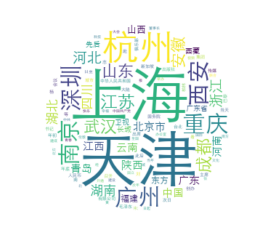

In [31]:
test()

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [32]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
 
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
 
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/liujunhong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


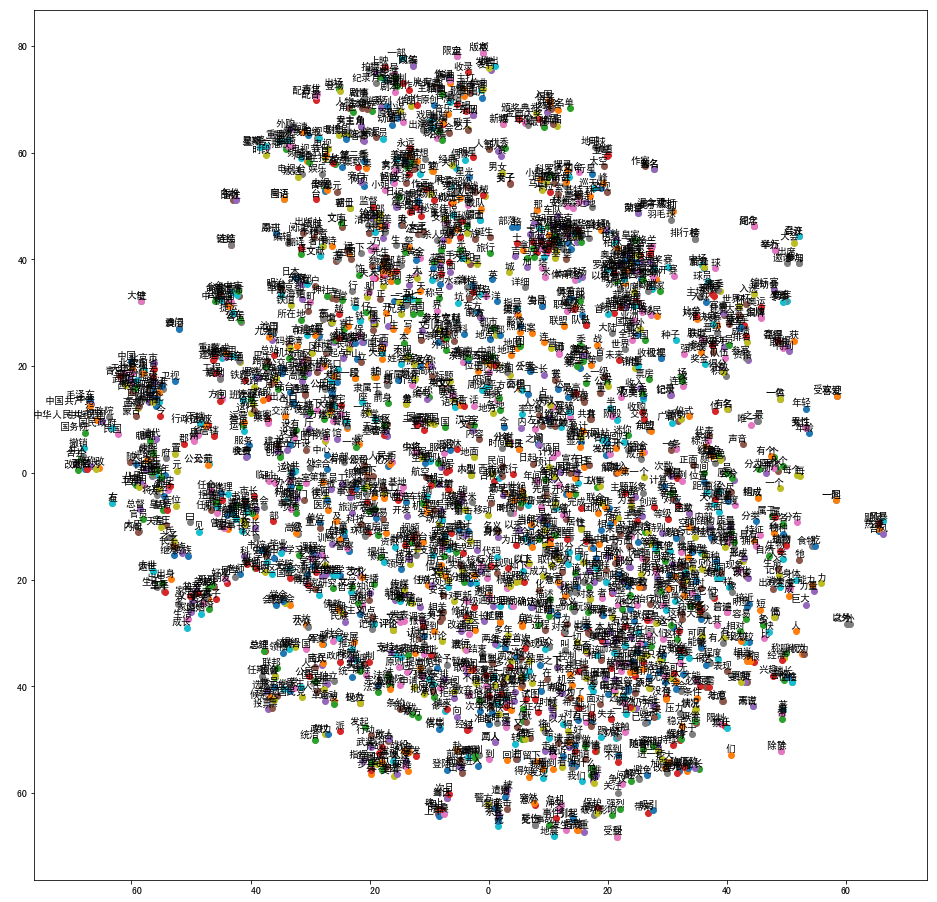

In [33]:
tsne_plot(cbow_model_10000)